In [1]:
# data processing packages
import numpy as np   
import pandas as pd
import scipy as sp

from pandas import *
from numpy import *

from scipy import linalg
from scipy import *

import pylab 
import scipy.stats as stats

 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random


import statsmodels.api as sm

# local packages 
from utils_causal import *

import pickle

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def read_y_yh(file_path):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)
    print(np.shape(data))

    y = np.asarray([i[0] for i in data])
    yh = np.asarray([i[1] for i in data])
    
    return y, yh

def cumulative_error_qq_plot(file_path1, file_path2, title1, title2, ylabel, axis_range, file_name, bool_filter):
    
    # cumulative error 
    
    import scipy.stats as stats
    import statsmodels.api as sm
    
    fig, ax = plt.subplots(ncols = 2, figsize = (16,5));
    
    y1, yh1 = read_y_yh(file_path1)
    sm.qqplot(y1-yh1, stats.norm, fit = True, line='45',  ax = ax[0]);
    
    ax[0].set_xlim(axis_range[0], axis_range[1])
    ax[0].set_ylim(axis_range[0], axis_range[1])
    ax[0].set_title(title1)
    
    y2, yh2 = read_y_yh(file_path2)
    
    if bool_filter == True:
        resi = np.asarray( sorted(list(y2-yh2))[10:] )
    else:
        resi = y2-yh2
        
    sm.qqplot(resi, stats.norm, fit = True, line='45',  ax = ax[1]);
    
    ax[1].set_xlim(axis_range[0], axis_range[1])
    ax[1].set_ylim(axis_range[0], axis_range[1])
    ax[1].set_title(title2)
    
    plt.show()
    fig.savefig('../../ts_results/figure/' + file_name + '.eps', bbox_inches='tight')
    
    # histogarm
    
    fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

    ax[0].hist(y1-yh1, bins = 30, density = True);
    ax[1].hist(y2-yh2, bins = 30, density = True);
    
    print("RMSE: ", sqrt(mean((y1-yh1)**2)), sqrt(mean((y2-yh2)**2)))
    
    k2, p = sp.stats.normaltest(y1-yh1)
    print("Normal test on error 1", p)
    
    k2, p = sp.stats.normaltest(y2-yh2)
    print("Normal test on error 2", p)
    
def cumulative_error_qq_plot_data(y1, yh1, y2, yh2, title1, title2, ylabel, axis_range, file_name, bool_filter):
    
    # cumulative error 
    
    import scipy.stats as stats
    import statsmodels.api as sm
    
    fig, ax = plt.subplots(ncols = 2, figsize = (16,5));
    
    sm.qqplot(y1-yh1, stats.norm, fit = True, line='45',  ax = ax[0]);
    
    ax[0].set_xlim(axis_range[0], axis_range[1])
    ax[0].set_ylim(axis_range[0], axis_range[1])
    ax[0].set_title(title1)
    
    if bool_filter == True:
        resi = np.asarray( sorted(list(y2-yh2))[50:-50] )
    else:
        resi = y2-yh2
        
    sm.qqplot(resi, stats.norm, fit = True, line='45',  ax = ax[1]);
    
    ax[1].set_xlim(axis_range[0], axis_range[1])
    ax[1].set_ylim(axis_range[0], axis_range[1])
    ax[1].set_title(title2)
    
    plt.show()
    fig.savefig('../../ts_results/figure/' + file_name + '.eps', bbox_inches='tight')
    
    # histogarm
    
    fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

    ax[0].hist(y1-yh1, bins = 30, density = True);
    ax[1].hist(y2-yh2, bins = 30, density = True);
    
    print("RMSE: ", sqrt(mean((y1-yh1)**2)), sqrt(mean((y2-yh2)**2)))
    
    k2, p = sp.stats.normaltest(y1-yh1)
    print("Normal test on error 1", p)
    
    k2, p = sp.stats.normaltest(y2-yh2)
    print("Normal test on error 2", p)
    
    
def cumulative_error_plot(file_path1, file_path2, xlabel1, xlabel2, ylabel):
    
    # cumulative error 
    
    fig, ax = plt.subplots(ncols = 2, figsize = (16,5));
    
    y1, yh1 = read_y_yh(file_path1)
    values, base = np.histogram(y1-yh1, bins = 50)
    cumulative = np.cumsum(values)
    ax[0].plot(base[:-1], 1.0*cumulative/len(y1), c = 'blue');
    
    y2, yh2 = read_y_yh(file_path2)
    values, base = np.histogram(y2-yh2, bins = 50)
    cumulative = np.cumsum(values)
    ax[1].plot(base[:-1], 1.0*cumulative/len(y2), c = 'blue');
    
    plt.show()
    
    # histogarm
    
    fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

    ax[0].hist(y1-yh1, bins = 30, density = True);
    ax[1].hist(y2-yh2, bins = 30, density = True);
    
    print("RMSE: ", sqrt(mean((y1-yh1)**2)), sqrt(mean((y2-yh2)**2)))
    
    k2, p = sp.stats.normaltest(y1-yh1)
    print("Normal test on error 1", p)
    
    k2, p = sp.stats.normaltest(y2-yh2)
    print("Normal test on error 2", p)
    

def filter_smooth(x):
    
    tmpx = []
    for idx, val in enumerate(x):
        if idx > 1 and val-x[idx-1] > 0.5*x[idx-1]:
            tmpx.append(x[idx-1])
        else:
            tmpx.append(val)
    
    return tmpx


(527, 2)
(527, 2)


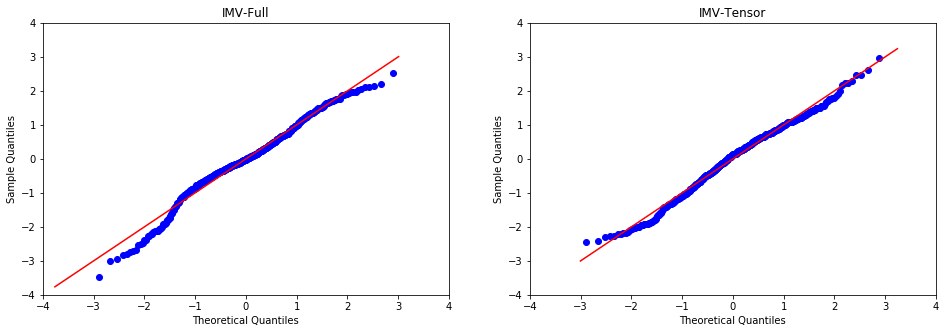

RMSE:  0.014755686114614726 0.00951244235131381
Normal test on error 1 0.0002657621475148918
Normal test on error 2 2.1698899685123013e-05


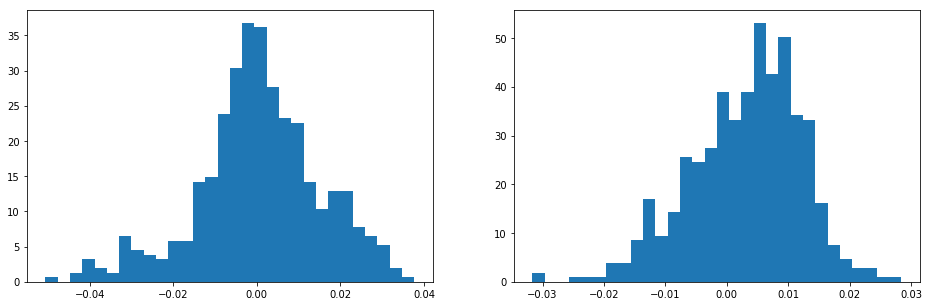

In [12]:
# ---- SML 

path_full = "../../ts_results/error_plot_ml4/test_full_sml_01.00.0001_.p"
path_tensor = "../../ts_results/error_plot_ml4/test_tensor_sml_01.00.0001_.p"

cumulative_error_qq_plot("../../ts_results/error_plot_ml4/test_full_sml_01.00.0001_.p",\
                      "../../ts_results/error_plot_ml4/test_tensor_sml_01.00.0001_.p",\
                      "IMV-Full", "IMV-Tensor","ylabel", [-4, +4], "sml_qq", True )

(527, 2)
(527, 2)


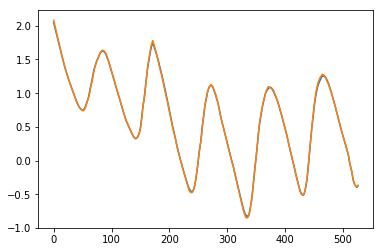

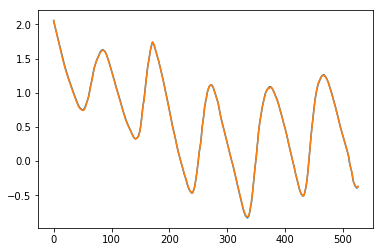

In [16]:
y1, yh1 = read_y_yh(path_full)
fig, ax = plt.subplots()

ax.plot(y1)
ax.plot(yh1)

y1, yh1 = read_y_yh(path_tensor)
fig, ax = plt.subplots()

ax.plot(y1)
ax.plot(yh1)

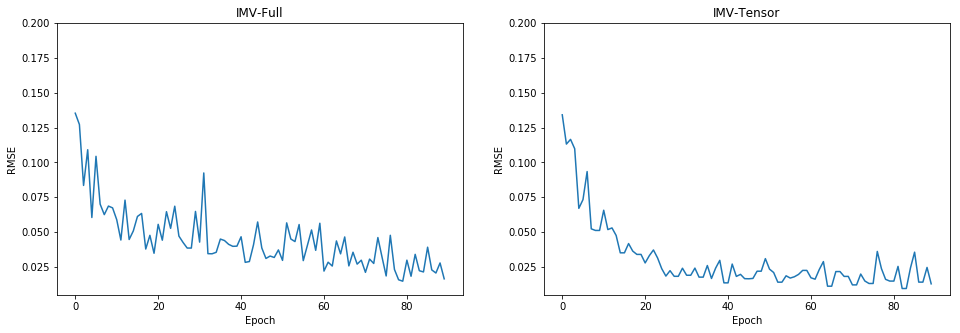

In [5]:
log_tensor = pd.read_csv("../../ts_results/error_plot_ml4/log_tensor_sml.csv", 
                  header = None, 
                  names = ["epoch", "loss", "train", "rmse","mae","mape"])

log_full = pd.read_csv("../../ts_results/error_plot_ml4/log_full_sml.csv", 
                  header = None, 
                  names = ["epoch", "loss", "train", "rmse", "mae", "mape"])


fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

ax[0].plot(log_full["rmse"][:90]);
ax[0].set_ylim(0.005, 0.2)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("RMSE")
ax[0].set_title("IMV-Full")

ax[1].plot( filter_smooth(list(log_tensor["rmse"]))[:90] );
ax[1].set_ylim(0.005, 0.2)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("RMSE")
ax[1].set_title("IMV-Tensor")

fig.savefig('../../ts_results/figure/sml_epoch_err.eps', bbox_inches='tight')

In [3]:
# ---- NASDAQ

# cumulative/len(y1)
# cumulative_error_plot("../../ts_results/error_plot2/test_tensor_nasdaq_01.01e-05_.p",\
#                       "../../ts_results/error_plot2/test_tensor_nasdaq_01.01e-05_.p",\
#                       "xlabel", "xlabel","ylabel")

path_full = "../../ts_results/error_plot/test_full_nasdaq_01.01e-05_.p"
path_tensor = "../../ts_results/error_plot_ml4/test_tensor_nasdaq_01.01e-05_.p"

y1, yh1 = read_y_yh(path_full)

y_df = pd.read_csv("../../ts_results/error_plot_ml4/test_tensor_nasdaq_01.01e-05_.csv")
y2 = np.asarray(y_df['truth'])
yh2 = np.asarray(y_df['pred'])

cumulative_error_qq_plot_data(y1, yh1, y2, yh2, "IMV-Full", "IMV-Tensor", "ylabel", \
                              [-5, +5], "nasdaq_qq", True)



UnicodeDecodeError: 'ascii' codec can't decode byte 0xba in position 0: ordinal not in range(128)

In [4]:
y1, yh1 = read_y_yh("../../ts_results/error_plot_ml4/test_tensor_nasdaq_01.01e-05_.p")
y_df = pd.DataFrame( list(zip(y1,yh1)) )

print(y_df.shape)
print(y_df.iloc[:2])

y_df.to_csv("../../ts_results/error_plot_ml4/test_tensor_nasdaq_01.01e-05_.csv", \
            header = ["truth", "pred"], index= False)

(2720, 2)
(2720, 2)
          0         1
0 -0.194917 -0.198155
1 -0.198007 -0.194857


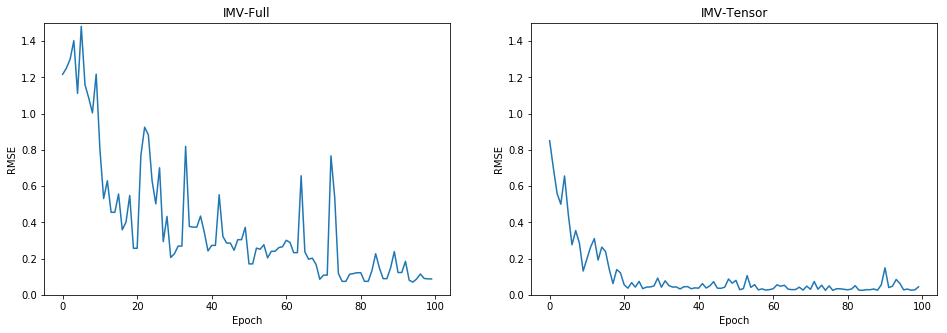

In [6]:
log_full = pd.read_csv("../../ts_results/error_plot_ml4/log_full_nasdaq_1.csv", 
                       header = None, 
                       names = ["epoch", "loss", "train", "rmse", "mae", "mape"])

log_tensor = pd.read_csv("../../ts_results/error_plot_ml4/log_tensor_nasdaq.csv", 
                         header = None, 
                         names = ["epoch", "loss", "train", "rmse","mae","mape"])


fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

ax[0].plot( filter_smooth(list(log_full["rmse"])) );
ax[0].set_ylim(0.000, 1.5)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("RMSE")
ax[0].set_title("IMV-Full")

ax[1].plot((list(log_tensor["rmse"])) );
ax[1].set_ylim(0.000, 1.5)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("RMSE")
ax[1].set_title("IMV-Tensor")

fig.savefig('../../ts_results/figure/nasdaq_epoch_err.eps', bbox_inches='tight')

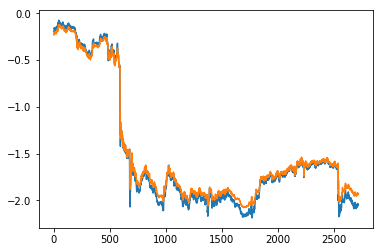

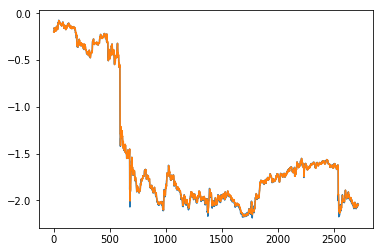

In [17]:
fig, ax = plt.subplots()

ax.plot(y1)
ax.plot(yh1)

fig, ax = plt.subplots()

ax.plot(y2)
ax.plot(yh2)

(718, 2)
(718, 2)


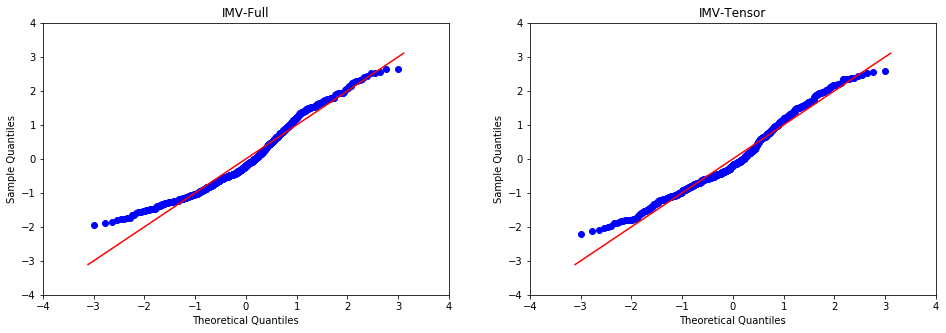

('RMSE: ', 162.764231920569, 158.9229245875402)
('Normal test on error 1', 3.2209417991834132e-12)
('Normal test on error 2', 1.4415769453417046e-07)


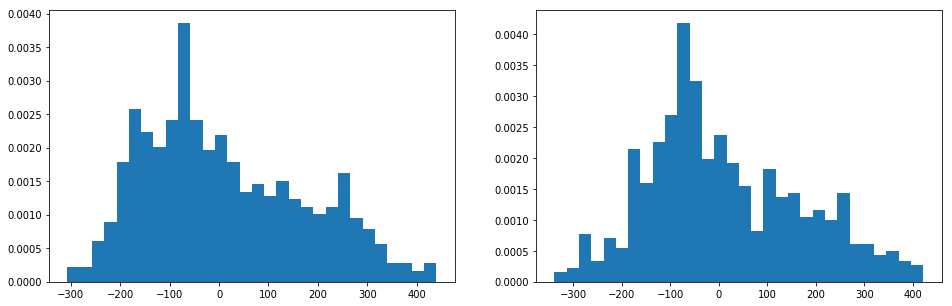

In [3]:
# ---- PLANT

path_full = "../../ts_results/error_plot/test_full_plant_00.80.0001_.p"
path_tensor = "../../ts_results/error_plot/test_tensor_plant_01.01e-05_.p"

cumulative_error_qq_plot("../../ts_results/error_plot/test_full_plant_00.80.0001_.p",\
                         "../../ts_results/error_plot/test_tensor_plant_01.01e-05_.p",\
                         "IMV-Full", "IMV-Tensor","ylabel", [-4, +4], "plant_qq", False)


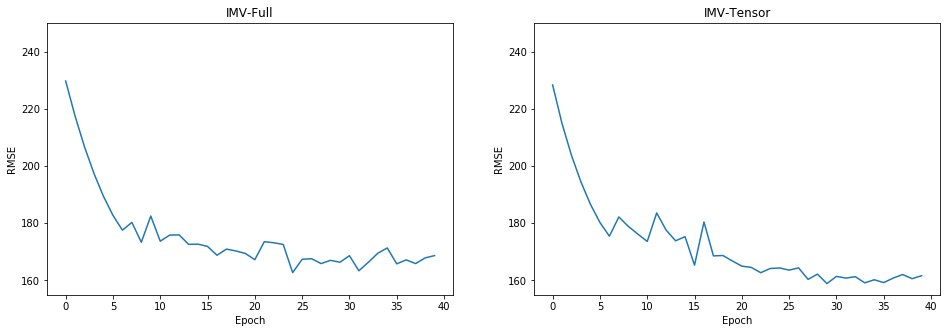

In [4]:
log_full = pd.read_csv("../../ts_results/error_plot_ml4/log_full_plant.csv", 
                       header = None, 
                       names = ["epoch", "loss", "train", "rmse", "mae", "mape"])

log_tensor = pd.read_csv("../../ts_results/error_plot_ml4/log_tensor_plant.csv", 
                         header = None, 
                         names = ["epoch", "loss", "train", "rmse","mae","mape"])


fig, ax = plt.subplots(ncols = 2, figsize=(16,5));

# filter_smooth
ax[0].plot( list(log_full["rmse"])[:40] );
ax[0].set_ylim(155, 250)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("RMSE")
ax[0].set_title("IMV-Full")

ax[1].plot( list(log_tensor["rmse"])[:40] );
ax[1].set_ylim(155, 250)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("RMSE")
ax[1].set_title("IMV-Tensor")

fig.savefig('../../ts_results/figure/plant_epoch_err.eps', bbox_inches='tight')

(718, 2)
(718, 2)


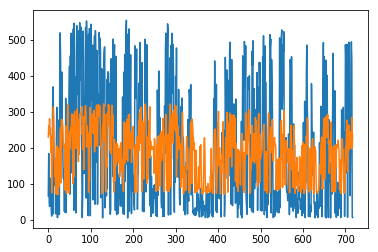

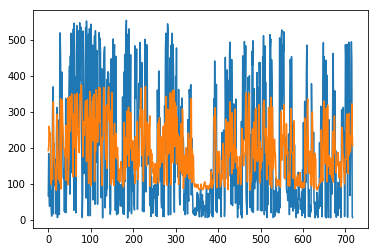

In [19]:
y1, yh1 = read_y_yh(path_full)
fig, ax = plt.subplots()

ax.plot(y1)
ax.plot(yh1)

y1, yh1 = read_y_yh(path_tensor)
fig, ax = plt.subplots()

ax.plot(y1)
ax.plot(yh1)